# NERC region maps
NERC shapefiles are from *Tamayao, M.-A. M., Michalek, J. J., Hendrickson, C. & Azevedo, I. M. L. Regional Variability and Uncertainty of Electric Vehicle Life Cycle CO2 Emissions across the United States. Environ. Sci. Technol. 49, 8844–8855 (2015)*.


This notebook should be run after the `Paper figures` notebook. The index summary table used here is calculated at the end of that notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import os
from os.path import join
import pandas as pd
import sys


sns.set(style='white')
cwd = os.getcwd()
data_path = join(cwd, '..', 'Data storage')
figure_path = join(cwd,'..', 'Figures')
file_date = '2018-03-06'

In [2]:
%load_ext watermark
%watermark -v -p pandas,geopandas,shapely

CPython 3.6.4
IPython 6.2.1

pandas 0.22.0
geopandas 0.3.0
shapely 1.6.4.post1


In [3]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

In [4]:
# add the 'src' directory as one where we can import modules
src_dir = join(cwd, os.pardir, 'src')
sys.path.append(src_dir)

In [5]:
%aimport Plots.plot
from Plots.plot import plot_nerc_annual

## Read NERC regions shapefile

In [6]:
path = os.path.join(data_path, 'nercregions', 'NERCregions.shp')
regions_nerc = gpd.read_file(path)
regions_nerc['nerc'] = regions_nerc['NERCregion']

In [7]:
regions_nerc

,OBJECTID,NERCregion,SHAPE_Leng,SHAPE_Area,geometry,nerc
0,1,FRCC,22.488030,11.459289,POLYGON ((-84.86300370899994 30.71266453000004...,FRCC
1,2,MRO,76.997961,130.425939,"POLYGON ((-94.8320392469999 49.33080593000005,...",MRO
2,3,NPCC,48.574281,32.754394,(POLYGON ((-72.5509712409999 40.96617993100006...,NPCC
3,4,RFC,99.332877,71.157869,(POLYGON ((-87.92640864299995 44.5391396020000...,RFC
4,5,SERC,128.958444,142.139208,POLYGON ((-80.20680177299994 36.54903791300006...,SERC
5,6,SPP,61.523164,56.496471,POLYGON ((-97.56098691099993 36.38533196100008...,SPP
6,7,TRE,44.145641,50.605118,POLYGON ((-104.4498774409999 32.00686615000006...,TRE
7,8,WECC,102.110211,323.227276,(POLYGON ((-122.6656125679999 48.3967777520000...,WECC


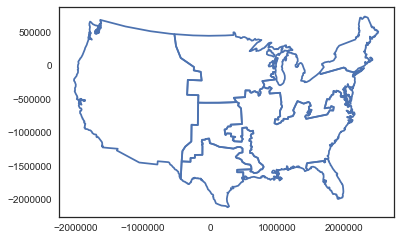

In [8]:
regions_nerc.to_crs(epsg=2163).boundary.plot()

## Read states shapefile

In [9]:
path = os.path.join(data_path, 'cb_2016_us_state_20m', 'cb_2016_us_state_20m.shp')
states = gpd.read_file(path)
states.crs

{'init': 'epsg:4269'}

In [10]:
drop_states = ['Alaska', 'Hawaii', 'Puerto Rico']
states = states.loc[~states['NAME'].isin(drop_states)]

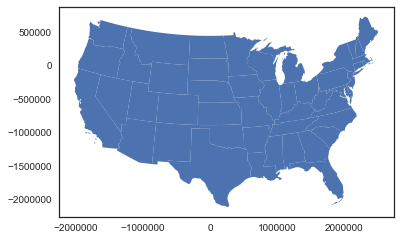

In [11]:
states.to_crs(epsg=2163).plot()

In [12]:
path = join(data_path, 'final NERC data',
            'Summary table {}.csv'.format(file_date))
index = pd.read_csv(path, index_col='nerc')
index

,2001,2017,Reduction,Percent Reduction,Annual Reduction
nerc,,,,,
TRE,609.537529,439.289665,170.247864,0.279307,10.640492
WECC,520.591372,346.313227,174.278145,0.334770,10.892384
USA,630.015064,438.652664,191.362400,0.303743,11.960150
SERC,633.312208,425.263073,208.049135,0.328510,13.003071
RFC,675.979943,461.569398,214.410546,0.317185,13.400659
FRCC,647.751776,410.050361,237.701415,0.366964,14.856338
NPCC,414.615688,172.799260,241.816428,0.583230,15.113527
MRO,854.369109,545.642751,308.726358,0.361350,19.295397
SPP,854.155315,491.243974,362.911341,0.424877,22.681959


In [13]:
index.loc['USA', '2001']

630.0150637090508

In [14]:
# Add 2001, 2017, and % reduction values from summary table to geodataframe
for nerc in regions_nerc['nerc'].unique():
    try:
        val_2017 = index.loc[nerc, '2017']
        val_2001 = index.loc[nerc, '2001']
        reduce = index.loc[nerc, 'Percent Reduction']
        regions_nerc.loc[regions_nerc['nerc']==nerc, 2017] = val_2017
        regions_nerc.loc[regions_nerc['nerc']==nerc, 2001] = val_2001
        
        regions_nerc.loc[regions_nerc['nerc']==nerc, 'reduction'] = '{:.0%}'.format(reduce)
        regions_nerc.loc[regions_nerc['nerc']==nerc, 'reduction value'] = reduce
    except:
        pass

# Define national parameters for use in plot titles
usa_2001 = index.loc['USA', '2001']
usa_2017 = index.loc['USA', '2017']

In [15]:
regions_nerc

,OBJECTID,NERCregion,SHAPE_Leng,SHAPE_Area,geometry,nerc,2017,2001,reduction,reduction value
0,1,FRCC,22.488030,11.459289,POLYGON ((-84.86300370899994 30.71266453000004...,FRCC,410.050361,647.751776,37%,0.366964
1,2,MRO,76.997961,130.425939,"POLYGON ((-94.8320392469999 49.33080593000005,...",MRO,545.642751,854.369109,36%,0.361350
2,3,NPCC,48.574281,32.754394,(POLYGON ((-72.5509712409999 40.96617993100006...,NPCC,172.799260,414.615688,58%,0.583230
3,4,RFC,99.332877,71.157869,(POLYGON ((-87.92640864299995 44.5391396020000...,RFC,461.569398,675.979943,32%,0.317185
4,5,SERC,128.958444,142.139208,POLYGON ((-80.20680177299994 36.54903791300006...,SERC,425.263073,633.312208,33%,0.328510
5,6,SPP,61.523164,56.496471,POLYGON ((-97.56098691099993 36.38533196100008...,SPP,491.243974,854.155315,42%,0.424877
6,7,TRE,44.145641,50.605118,POLYGON ((-104.4498774409999 32.00686615000006...,TRE,439.289665,609.537529,28%,0.279307
7,8,WECC,102.110211,323.227276,(POLYGON ((-122.6656125679999 48.3967777520000...,WECC,346.313227,520.591372,33%,0.334770


### Transform projection to Albers equal area

In [71]:
regions_albers = regions_nerc.to_crs(epsg=2163)
states_albers = states.to_crs(epsg=2163)

### Maps of 2001 and 2017 annual values

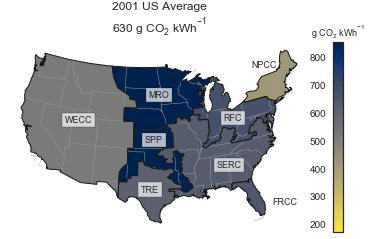

In [42]:
title = '2001 US Average\n{:.0f} g $\mathregular{{CO_2 \ kWh^{{-1}}}}$'.format(usa_2001)
kwargs = dict(
    regions_lw = 1,
    regions_ec = '0.1',
    SERC_y = -1.5,
    SPP_y = 2.25
)

vmin = regions_albers.loc[:, [2001, 2017]].min().min()
vmax = regions_albers.loc[:, [2001, 2017]].max().max()
plot_nerc_annual(regions_proj=regions_albers, states_proj=states_albers, data_col=2001,
                 text_col='nerc', vmin=vmin, vmax=vmax, title=title,
                 cbar_title='g $\mathregular{CO_2 \ kWh^{-1}}$', **kwargs)

path = join(figure_path, 'NERC map_cividis_2001.pdf')
plt.savefig(path, bbox_inches='tight')#, dpi=350)

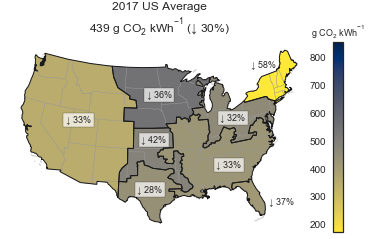

In [43]:
title = '2017 US Average\n{:.0f} g $\mathregular{{CO_2 \ kWh^{{-1}}}}$ (↓ 30%)'.format(usa_2017)
kwargs = dict(
    regions_lw = 1,
    regions_ec = '0.1',
    SERC_y = -1.5,
    SPP_y = 2.25,
    FRCC_x = 4.3
)

vmin = regions_albers.loc[:, [2001, 2017]].min().min()
vmax = regions_albers.loc[:, [2001, 2017]].max().max()
regions_albers['arrow reduction'] = '↓ ' + regions_albers['reduction']
plot_nerc_annual(regions_proj=regions_albers, states_proj=states_albers, data_col=2017,
                 text_col='arrow reduction', vmin=vmin, vmax=vmax, title=title,
                 cbar_title='g $\mathregular{CO_2 \ kWh^{-1}}$', **kwargs)
path = join(figure_path, 'NERC map_cividis_2017_change.pdf')
plt.savefig(path, bbox_inches='tight')#, dpi=350)

## Make animated version

In [43]:
path = join(data_path, 'final NERC data',
            'NERC gen emissions and index {}.csv'.format(file_date))
df = pd.read_csv(path, parse_dates=[6])
df.rename(columns={'index': 'index g/kwh'}, inplace=True)

In [44]:
df.head()

,year,nerc,month,final co2 (kg),generation (mwh),index g/kwh,datetime
0,2001,ASCC,1,2.780216e+08,510124.027,545.007802,2001-01-01
1,2001,ASCC,2,2.694399e+08,457691.568,588.693180,2001-02-01
2,2001,ASCC,3,2.944447e+08,493876.659,596.190762,2001-03-01
3,2001,ASCC,4,2.357533e+08,417279.658,564.976768,2001-04-01
4,2001,ASCC,5,2.306594e+08,409477.108,563.302275,2001-05-01


In [29]:
df.nerc.unique()

array(['ASCC', 'FRCC', 'HICC', 'MRO', 'NPCC', 'RFC', 'SERC', 'SPP', 'TRE',
       'WECC'], dtype=object)

In [18]:
df.dtypes

year                         int64
nerc                        object
month                        int64
final co2 (kg)             float64
generation (mwh)           float64
index                      float64
datetime            datetime64[ns]
dtype: object

### Function to produce monthly plots

In [28]:
list(df.groupby('datetime'))

[(Timestamp('2001-01-01 00:00:00'),
       year  nerc  month  final co2 (kg)  generation (mwh)       index  \
  0    2001  ASCC      1    2.780216e+08      5.101240e+05  545.007802   
  12   2001  FRCC      1    1.056970e+10      1.608395e+07  657.158071   
  24   2001  HICC      1    7.250720e+08      9.158574e+05  791.686608   
  36   2001   MRO      1    1.469143e+10      1.736838e+07  845.872092   
  48   2001  NPCC      1    1.078963e+10      2.240238e+07  481.628846   
  60   2001   RFC      1    5.834447e+10      8.648786e+07  674.597276   
  72   2001  SERC      1    5.871628e+10      8.894906e+07  660.111345   
  84   2001   SPP      1    1.396892e+10      1.557308e+07  896.991623   
  96   2001   TRE      1    1.541763e+10      2.533616e+07  608.522842   
  108  2001  WECC      1    2.939742e+10      5.607795e+07  524.224297   
  
        datetime  
  0   2001-01-01  
  12  2001-01-01  
  24  2001-01-01  
  36  2001-01-01  
  48  2001-01-01  
  60  2001-01-01  
  72  2001-01-

In [25]:
df.loc[0, 'datetime'].strftime('%B %Y')

'January 2001'

In [64]:
dt, _df = list(df.groupby('datetime'))[0]

In [65]:
_df

,year,nerc,month,final co2 (kg),generation (mwh),index g/kwh,datetime
0,2001,ASCC,1,2.780216e+08,5.101240e+05,545.007802,2001-01-01
12,2001,FRCC,1,1.056970e+10,1.608395e+07,657.158071,2001-01-01
24,2001,HICC,1,7.250720e+08,9.158574e+05,791.686608,2001-01-01
36,2001,MRO,1,1.469143e+10,1.736838e+07,845.872092,2001-01-01
48,2001,NPCC,1,1.078963e+10,2.240238e+07,481.628846,2001-01-01
60,2001,RFC,1,5.834447e+10,8.648786e+07,674.597276,2001-01-01
72,2001,SERC,1,5.871628e+10,8.894906e+07,660.111345,2001-01-01
84,2001,SPP,1,1.396892e+10,1.557308e+07,896.991623,2001-01-01
96,2001,TRE,1,1.541763e+10,2.533616e+07,608.522842,2001-01-01
108,2001,WECC,1,2.939742e+10,5.607795e+07,524.224297,2001-01-01


In [66]:
regions_albers = regions_albers.merge(_df, on='nerc', how='inner')

In [67]:
regions_albers.crs

{'init': 'epsg:2163', 'no_defs': True}

In [68]:
regions_albers

,OBJECTID,NERCregion,SHAPE_Leng,SHAPE_Area,geometry,nerc,year,month,final co2 (kg),generation (mwh),index g/kwh,datetime
0,1,FRCC,22.488030,11.459289,POLYGON ((1449273.830832716 -1456958.343515482...,FRCC,2001,1,1.056970e+10,1.608395e+07,657.158071,2001-01-01
1,2,MRO,76.997961,130.425939,"POLYGON ((374429.8440713357 493623.3279624404,...",MRO,2001,1,1.469143e+10,1.736838e+07,845.872092,2001-01-01
2,3,NPCC,48.574281,32.754394,(POLYGON ((2253079.253568084 -66256.4165988560...,NPCC,2001,1,1.078963e+10,2.240238e+07,481.628846,2001-01-01
3,4,RFC,99.332877,71.157869,(POLYGON ((952511.1120015961 19839.29026715389...,RFC,2001,1,5.834447e+10,8.648786e+07,674.597276,2001-01-01
4,5,SERC,128.958444,142.139208,POLYGON ((1752703.277373535 -730648.5768104114...,SERC,2001,1,5.871628e+10,8.894906e+07,660.111345,2001-01-01
5,6,SPP,61.523164,56.496471,POLYGON ((218913.7093392683 -953833.7790824835...,SPP,2001,1,1.396892e+10,1.557308e+07,896.991623,2001-01-01
6,7,TRE,44.145641,50.605118,POLYGON ((-422066.3459257071 -1430741.21519987...,TRE,2001,1,1.541763e+10,2.533616e+07,608.522842,2001-01-01
7,8,WECC,102.110211,323.227276,(POLYGON ((-1645811.015522783 614358.704888971...,WECC,2001,1,2.939742e+10,5.607795e+07,524.224297,2001-01-01


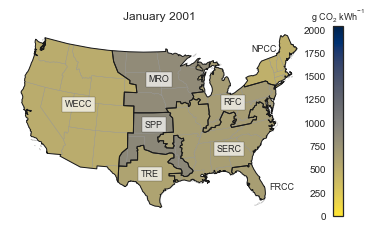

In [72]:
vmin = df.index.min()
vmax = df.index.max()

regions_month = pd.merge(regions_albers, _df, on='nerc', how='inner')

kwargs = dict(
    regions_lw = 1,
    regions_ec = '0.1',
    SERC_y = -1.5,
    SPP_y = 2.25,
    FRCC_x = 4.3
)

plot_nerc_annual(regions_proj=regions_month, states_proj=states_albers, data_col='index g/kwh',
                 text_col='nerc', vmin=vmin, vmax=vmax, title=dt.strftime('%B %Y'),
                 cbar_title='g $\mathregular{CO_2 \ kWh^{-1}}$', **kwargs)

In [75]:
plt.rcParams['savefig.dpi']

'figure'

In [84]:
vmin = df.loc[df.nerc.isin(regions_albers.nerc), 'index g/kwh'].min()
vmax = df.loc[df.nerc.isin(regions_albers.nerc), 'index g/kwh'].max()

def annual_index(df):
    df_temp = df.groupby('nerc').sum()
    df_temp['index g/kwh'] = df_temp['final co2 (kg)'] / df_temp['generation (mwh)']
    df_temp.reset_index(inplace=True)
    
    return df_temp

for idx, (yr, _df) in enumerate(df.groupby('year')):

#     dt_string = dt.strftime('%B %Y')
    yr_string = str(yr)

    annual_df = annual_index(_df)

    regions_month = pd.merge(regions_albers, annual_df, on='nerc', how='inner')

    kwargs = dict(
        regions_lw = 1,
        regions_ec = '0.1',
        SERC_y = -1.5,
        SPP_y = 2.25,
        FRCC_x = 4.3
    )

    plot_nerc_annual(regions_proj=regions_month, states_proj=states_albers, data_col='index g/kwh',
                 text_col='nerc', vmin=vmin, vmax=vmax, title=yr_string,
                 cbar_title='g $\mathregular{CO_2 \ kWh^{-1}}$', **kwargs)

    save_path = join(figure_path, 'NERC map gif', '{}_NERC map {}.png'.format(idx, yr_string))
    plt.savefig(save_path, bbox_inches='tight', dpi=150)
    plt.close()

In [85]:
regions_month

,OBJECTID,NERCregion,SHAPE_Leng,SHAPE_Area,geometry,nerc,year,month,final co2 (kg),generation (mwh),index g/kwh
0,1,FRCC,22.488030,11.459289,POLYGON ((1449273.830832716 -1456958.343515482...,FRCC,24204,78,9.380924e+10,2.287749e+08,410.050361
1,2,MRO,76.997961,130.425939,"POLYGON ((374429.8440713357 493623.3279624404,...",MRO,24204,78,1.185346e+11,2.172384e+08,545.642751
2,3,NPCC,48.574281,32.754394,(POLYGON ((2253079.253568084 -66256.4165988560...,NPCC,24204,78,3.914012e+10,2.265063e+08,172.799260
3,4,RFC,99.332877,71.157869,(POLYGON ((952511.1120015961 19839.29026715389...,RFC,24204,78,4.086607e+11,8.853721e+08,461.569398
4,5,SERC,128.958444,142.139208,POLYGON ((1752703.277373535 -730648.5768104114...,SERC,24204,78,4.539547e+11,1.067468e+09,425.263073
5,6,SPP,61.523164,56.496471,POLYGON ((218913.7093392683 -953833.7790824835...,SPP,24204,78,1.132513e+11,2.305398e+08,491.243974
6,7,TRE,44.145641,50.605118,POLYGON ((-422066.3459257071 -1430741.21519987...,TRE,24204,78,1.693587e+11,3.855285e+08,439.289665
7,8,WECC,102.110211,323.227276,(POLYGON ((-1645811.015522783 614358.704888971...,WECC,24204,78,2.470230e+11,7.132937e+08,346.313227


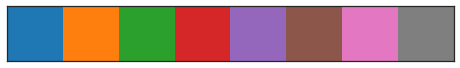

In [112]:
sns.palplot(sns.color_palette('tab10', 8))

In [114]:
sns.color_palette('tab10', 8)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)]

In [110]:
regions_albers

,OBJECTID,NERCregion,SHAPE_Leng,SHAPE_Area,geometry,nerc
0,1,FRCC,22.488030,11.459289,POLYGON ((1449273.830832716 -1456958.343515482...,FRCC
1,2,MRO,76.997961,130.425939,"POLYGON ((374429.8440713357 493623.3279624404,...",MRO
2,3,NPCC,48.574281,32.754394,(POLYGON ((2253079.253568084 -66256.4165988560...,NPCC
3,4,RFC,99.332877,71.157869,(POLYGON ((952511.1120015961 19839.29026715389...,RFC
4,5,SERC,128.958444,142.139208,POLYGON ((1752703.277373535 -730648.5768104114...,SERC
5,6,SPP,61.523164,56.496471,POLYGON ((218913.7093392683 -953833.7790824835...,SPP
6,7,TRE,44.145641,50.605118,POLYGON ((-422066.3459257071 -1430741.21519987...,TRE
7,8,WECC,102.110211,323.227276,(POLYGON ((-1645811.015522783 614358.704888971...,WECC


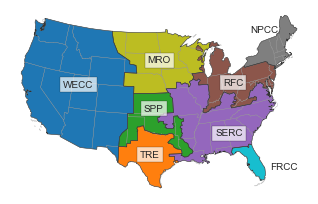

In [117]:
def conv_lon(x):
    newx = x * 20037508.34 / 180
    return newx

def conv_lat(y):
    newy = np.log(np.tan((90 + y) * np.pi / 360)) / (np.pi / 180)
    newy *= 20037508.34 / 180
    return newy

font_size = 10
bbox_alpha = 0.7

fig, ax = plt.subplots(figsize=(8,3.5))
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

regions_albers.plot(column='nerc', cmap='tab10_r', ax=ax)
states_albers.plot(ax=ax, color='none', edgecolor='0.6')
regions_albers.plot(ax=ax, color='none', edgecolor='0.2', linewidth=0.5)

for point, nerc in zip(regions_albers.centroid, regions_albers['nerc'].values):
        text = nerc
#         text = '{}'.format(nerc, reduce)
        x = point.x
        y = point.y
        if nerc == 'FRCC':
            x = x + conv_lon(4.75)#-79
            y = y - conv_lat(1)#28
            rot = -67
            plt.text(x, y, text, ha='center', va='center',
                     fontdict={'size':font_size})

        elif nerc == 'NPCC':
            x = x - conv_lon(1.5)
            y = y + conv_lat(2.1)
            plt.text(x, y, text, ha='center',
                     fontdict={'size':font_size})

        elif nerc == 'SERC':
            x = x + conv_lon(2)
            y = y + conv_lat(-2)
            plt.text(x, y, text, ha='center', va='center',
                     bbox=dict(facecolor='white',
                                alpha=bbox_alpha,
                                boxstyle="square"),
                     fontdict={'size':font_size})
        elif nerc == 'RFC':
#             x = x + conv_lon(RFC_x)
            y = y + conv_lat(-0.5)
            plt.text(x, y, text, ha='center', va='center',
                     bbox=dict(facecolor='white',
                                alpha=bbox_alpha,
                                boxstyle="square"),
                     fontdict={'size':font_size})

        elif nerc == 'SPP':
    #         x = x + 2
            y = y + conv_lat(1.75)
            plt.text(x, y, text, ha='center', va='center',
                     bbox=dict(facecolor='white',
                                alpha=bbox_alpha,
                                boxstyle="square"),
                     fontdict={'size':font_size})

        else:
            plt.text(x, y, text, ha='center', va='center',
                     bbox=dict(facecolor='white',
                                alpha=bbox_alpha,
                                boxstyle="square"),
                     fontdict={'size':font_size})

sns.despine(left=True, bottom=True)
ax.set_yticklabels(labels=[])
ax.set_xticklabels(labels=[])

save_path = join(figure_path, 'NERC map gif', 'NERC map categorical.pdf')
plt.savefig(save_path, bbox_inches='tight')